In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from datasets.SAheart import X, y

In [2]:
X = pd.DataFrame(
    data=StandardScaler().fit_transform(X),
    index=X.index, columns=X.columns,
)

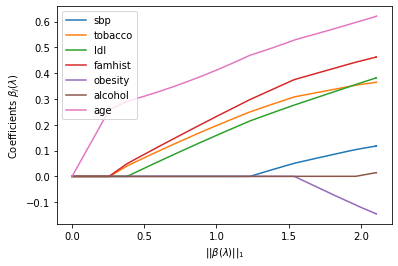

In [3]:
data = []
l1 = []

for C in np.logspace(-5, 5, num=1000):
    clf = LogisticRegression(penalty='l1', C=C, solver='liblinear')
    clf.fit(X, y)
    data.append(clf.coef_[0])
    l1.append(np.linalg.norm(clf.coef_[0], ord=1))

ax = pd.DataFrame(data=data, index=l1, columns=X.columns).plot()
ax.set_xlabel(r"$\left|\left|\beta(\lambda)\right|\right|_1$")
ax.set_ylabel(r"Coefficients $\beta_j(\lambda)$");